In [1]:
import raveforce
import matplotlib.pyplot as plt
%matplotlib inline

### Set the environment
Send the environment name to SuperCollider, specifying which one to experiment on.

Also initialise the Python module.

In [2]:
env = raveforce.make("drum_loop")

### Reset the env
Like OpenAI gym, it is necessary to ```.reset``` before ```.step```.

This method will return the ```observation_space```.

For now the ```observation_space``` is empty.

Actually, the SuperCollider server has synthesised a full bar (16-step) empty audio file in the background. Its length will be saved as the ```total_length``` which is useful later.

88256


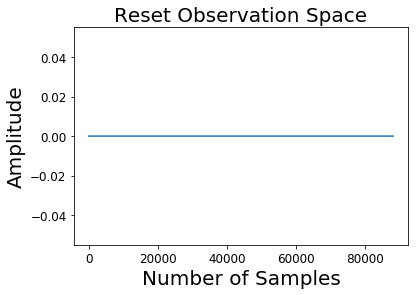

In [6]:
observation = env.reset()
print(env.total_length)
plt.title("Reset Observation Space", fontsize=20)
plt.tick_params(labelsize=12)
plt.xlabel("Number of Samples", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.plot(observation)

### Sample an action and then make the first step

The first part of ```reward``` is the opposite number of the mean square error sum of the MFCCs between the synthesised audio and the related part of target audio. For example, if the two audio files are quite different, the MSE of their MFCCs should be very large, say 10000. Then its opposite number -10000 added to the reward. Also, we have already tuned a baseline 2300 for it. (-10000 + 2300) still gives a negative reward. If they are pretty similar (which is good), say the MSE is 400. (-400 + 2300) gives a positive reward 1900.

The ```done``` are very straight-forward. 

The ```info``` contains current step and the unpadded observation (i.e. the actual synthesised audio).

The ```observation``` reflects the audio synthesised so far. 

Notice that the ```observation``` has been padded to have the same length as the ```total_length``` that we define in ```.reset```.

Thus, it is very convenient to use a single neural network to read current state and decide what to do next. For example, in ```.reset```, the input of the neural network is empty. Ideally, we hope the neural network can recognise this ```.reset``` state and then output the proper action for step 1. In the same way, in step 1, we hope the same neural can recognise this step 1 state and output the proper  action for state 2.

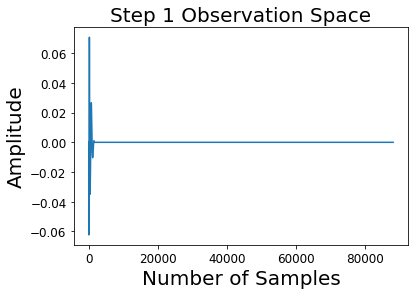

In [7]:
action = env.action_space.sample() #sample an action
observation, reward, done, info = env.step(4)
plt.title("Step 1 Observation Space", fontsize=20)
plt.tick_params(labelsize=12)
plt.xlabel("Number of Samples", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.plot(observation)

### The second step

The ```observation```, ```reward```, ```done``` and ```info``` will be updated.

The ```observation``` is quite intuitive shown on the picture.

action: 3 

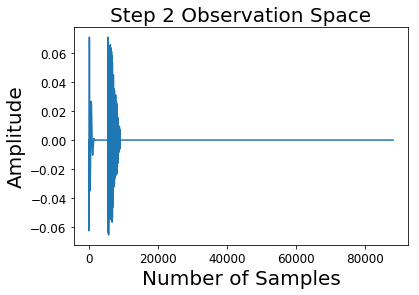

In [8]:
action = env.action_space.sample()
print("action:", action, end=' ')
observation, reward, done, info = env.step(3)
plt.title("Step 2 Observation Space", fontsize=20)
# print("|reward:", round(reward, 5), "| done:", done, "| step:", info[0])
plt.tick_params(labelsize=12)
plt.xlabel("Number of Samples", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.plot(observation)

### The rest steps

In step 16, ```done``` becomes ```True```.

action: 4 |reward: -9e-05 | done: False
action: 2 |reward: -9e-05 | done: False
action: 3 |reward: -0.00014 | done: False
action: 0 |reward: -0.00014 | done: False
action: 0 |reward: -0.00014 | done: False
action: 4 |reward: -0.00015 | done: False
action: 4 |reward: -0.00021 | done: False
action: 2 |reward: -0.00022 | done: False
action: 4 |reward: -0.00023 | done: False
action: 5 |reward: -0.00024 | done: False
action: 2 |reward: -0.00028 | done: False
action: 3 |reward: -0.00029 | done: False
action: 1 |reward: -0.0003 | done: False
action: 1 |reward: -0.00032 | done: True


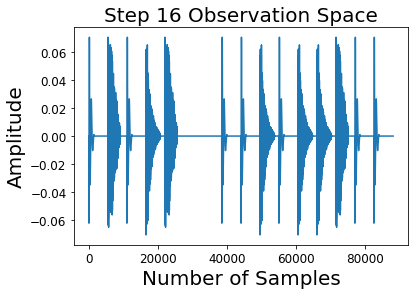

In [9]:
for _ in range(14):
    action = env.action_space.sample()
    print("action:", action, end=' ')
    observation, reward, done, info = env.step(action)
    print("|reward:", round(reward, 5), "| done:", done)
plt.title("Step 16 Observation Space", fontsize=20)
plt.tick_params(labelsize=12)
plt.xlabel("Number of Samples", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.plot(observation)

In [ ]:
for action in [4, 0, 3, 0, 5, 0, 3, 0, 4, 0, 3, 0, 5, 0, 3, 0]:
    observation, reward, done, info = env.step(action)
    print("|reward:", round(reward, 5), "| done:", done, "| step:", info["current_step"])
plt.plot(observation)

In [ ]:
o = env.reset()
plt.plot(o)

In [ ]:
env.reset()
observation, reward, done, info = env.step(4)
print("|reward:", round(reward, 5), "| done:", done, "| step:", info["current_step"])
plt.plot(observation)

In [ ]:
plt.plot(info[2])

In [ ]:
env.render()